<a href="https://www.kaggle.com/code/aayushsin7a/bank-churn-binary-classification?scriptVersionId=161216879" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 1. Import the required library

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import pandas as pd 
# Set the maximum number of displayed columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',None)
# Set the maximum column width for display
pd.set_option('display.max_colwidth', None)
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,roc_auc_score

import warnings
warnings.filterwarnings("ignore")

print("All the libraries loaded successfully")



/kaggle/input/playground-series-s4e1/sample_submission.csv
/kaggle/input/playground-series-s4e1/train.csv
/kaggle/input/playground-series-s4e1/test.csv
All the libraries loaded successfully


2. # Read the dataset

In [2]:
train = pd.read_csv("/kaggle/input/playground-series-s4e1/train.csv")
test = pd.read_csv("/kaggle/input/playground-series-s4e1/test.csv")


In [3]:
# Display these dataset for a quick overview 
train.head(5)

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [4]:
test.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00


In [5]:
print("Training set shape: ", train.shape)
print("Test set shape: ", test.shape)

Training set shape:  (165034, 14)
Test set shape:  (110023, 13)


Note that the test set has one column less than training set, the Exited column. This is because Exited is our response variable, or sometimes called a target variable. Our job is to analyse the data in the training set and predict if an customer Exits or stays in the test set.

3. # Data Dictionary

In [6]:
# Define the data dictionary
data_dict = {
    'Column Name': ['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
                    'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
                    'IsActiveMember', 'EstimatedSalary', 'Exited'],
    'Description': ['Unique identifier for each record.',
                    'Unique identifier for each customer.',
                    'Last name of the customer.',
                    'The credit score of the customer, a numerical measure of creditworthiness.',
                    'The geographical location or country of the customer.',
                    'The gender of the customer.',
                    'The age of the customer.',
                    'The number of years the customer has been with the bank or a similar institution.',
                    'The account balance of the customer.',
                    'The number of financial products the customer has with the bank.',
                    'Whether the customer has a credit card (binary: 1 for yes, 0 for no).',
                    'Whether the customer is an active member (binary: 1 for yes, 0 for no).',
                    'The estimated salary of the customer.',
                    'Whether the customer has exited or closed their account with the bank (binary: 1 for yes, 0 for no).']
}

# Create a DataFrame from the data dictionary
df_data_dict = pd.DataFrame(data_dict)

# Display the DataFrame in a tabular format
df_data_dict.head(14)


,Column Name,Description
0,id,Unique identifier for each record.
1,CustomerId,Unique identifier for each customer.
2,Surname,Last name of the customer.
3,CreditScore,"The credit score of the customer, a numerical measure of creditworthiness."
4,Geography,The geographical location or country of the customer.
5,Gender,The gender of the customer.
6,Age,The age of the customer.
7,Tenure,The number of years the customer has been with the bank or a similar institution.
8,Balance,The account balance of the customer.
9,NumOfProducts,The number of financial products the customer has with the bank.


In [7]:
# What about submission? 
ss = pd.read_csv("/kaggle/input/playground-series-s4e1/sample_submission.csv")
print(ss.head())

       id  Exited
0  165034     0.5
1  165035     0.5
2  165036     0.5
3  165037     0.5
4  165038     0.5


In [8]:
ss.shape

(110023, 2)

So, our final dataframe that is to be submitted should look something like this, 110023 rows and 2 columns, one for id and one for Exited.

4. # EDA 

> Exploratory data analysis is the process of visualising and analysing data to extract insights. In other words, we want to summarise important characteristics and trends in our data in order to gain a better understanding of our dataset.

In [9]:
# Non-null count and data types of the training and test set

train.info()
print('-'*40)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB
----------------------------------------
<class 'pandas.core.frame.DataFra

In [10]:
# Missing data in training set by columns

train.isnull().sum().sort_values(ascending = False)

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

5. # Summary statistics for training set  

In [11]:
train.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.0000,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,47641.3565,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,0.0000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41258.2500,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,82516.5000,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,123774.7500,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,165033.0000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [12]:
train['Age'] = train['Age'].astype("int")

> The Minimum Age is 18 which conveys that All customers are Adult.
- Age should be Integer type 

Index(['Surname', 'Geography', 'Gender'], dtype='object')
Value counts of Geography : 
Geography
France     94215
Spain      36213
Germany    34606
Name: count, dtype: int64



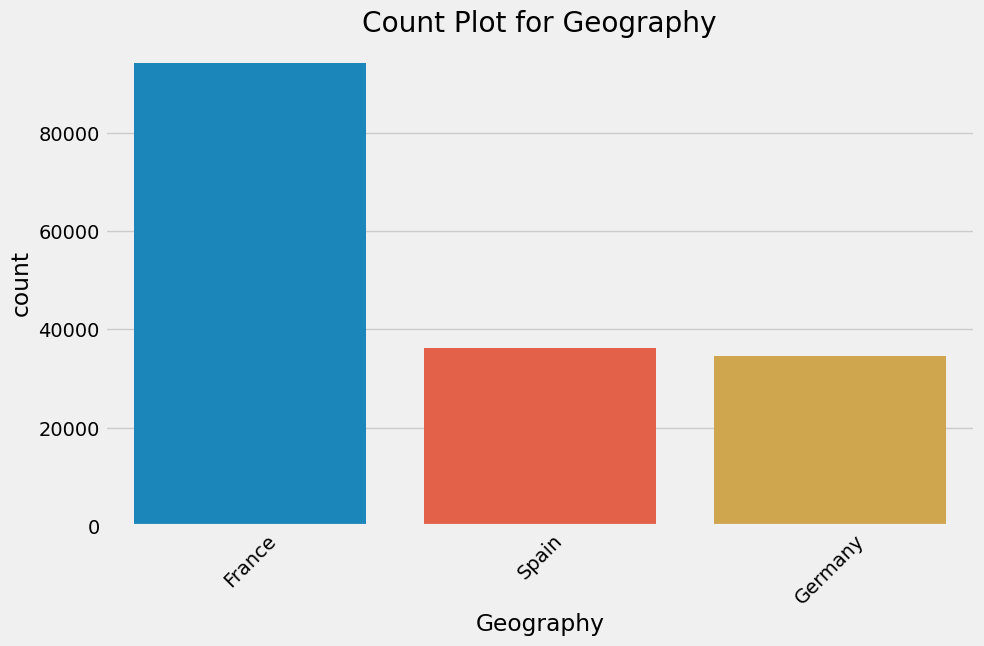

Value counts of Gender : 
Gender
Male      93150
Female    71884
Name: count, dtype: int64



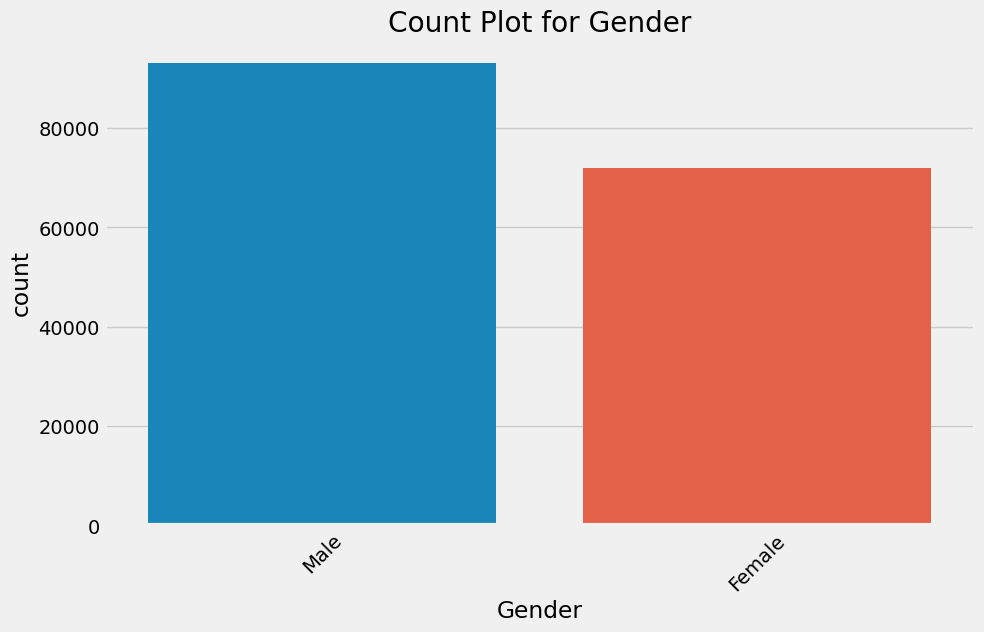

In [13]:
# Extract categorical columns
categorical_columns = train.select_dtypes(include=['object']).columns
print(categorical_columns)

categorical_columns = categorical_columns[~categorical_columns.isin(['Surname'])]

# Loop through categorical columns 
for column in categorical_columns:
  print(f"Value counts of {column} : \n{train[column].value_counts()}\n")
  # Plot count plot
  plt.figure(figsize=(10, 6))
  sns.countplot(x=column, data=train, order=train[column].value_counts().index)
  plt.title(f'Count Plot for {column}')
  plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
  plt.show()

In [14]:
def piePlot(df, col, attrition_col):
    plt.figure(figsize=(14, 6))
    
    # Extract value counts for the specified column
    value_counts = df[col].value_counts().sort_index()
    
    # First subplot: Pie chart
    plt.subplot(1, 2, 1) 
    ax1 = value_counts
    plt.title(f"Distribution of {col}", fontweight="black", size=14, pad=15)
    colors = sns.color_palette('Set1', len(ax1))
    plt.pie(ax1.values, labels=ax1.index, autopct="%.1f%%", pctdistance=0.75, startangle=90, 
            colors=colors, textprops={"size":14})
    center_circle = plt.Circle((0, 0), 0.4, fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(center_circle)
    
    # Second subplot: Bar plot
    plt.subplot(1, 2, 2)
    
    # Convert integer attrition column to 'Yes' and 'No'
    df['attrition_label'] = np.where(df[attrition_col] == 1, 'Yes', 'No')
    
    value_1 = value_counts
    value_2 = df[df['attrition_label'] == 'Yes'][col].value_counts().sort_index()
    
    ax2 = np.floor((value_2 / value_1) * 100).values
    sns.barplot(x=value_2.index, y=value_2.values, palette='Set1')
    plt.title(f"Exit Probability by {col}", fontweight="black", size=15, pad=15)
    for index, value in enumerate(value_2):
        plt.text(index, value, str(value) + " (" + str(int(ax2[index])) + "% )", ha="center", va="bottom", size=10)

        plt.tight_layout()
    plt.show()



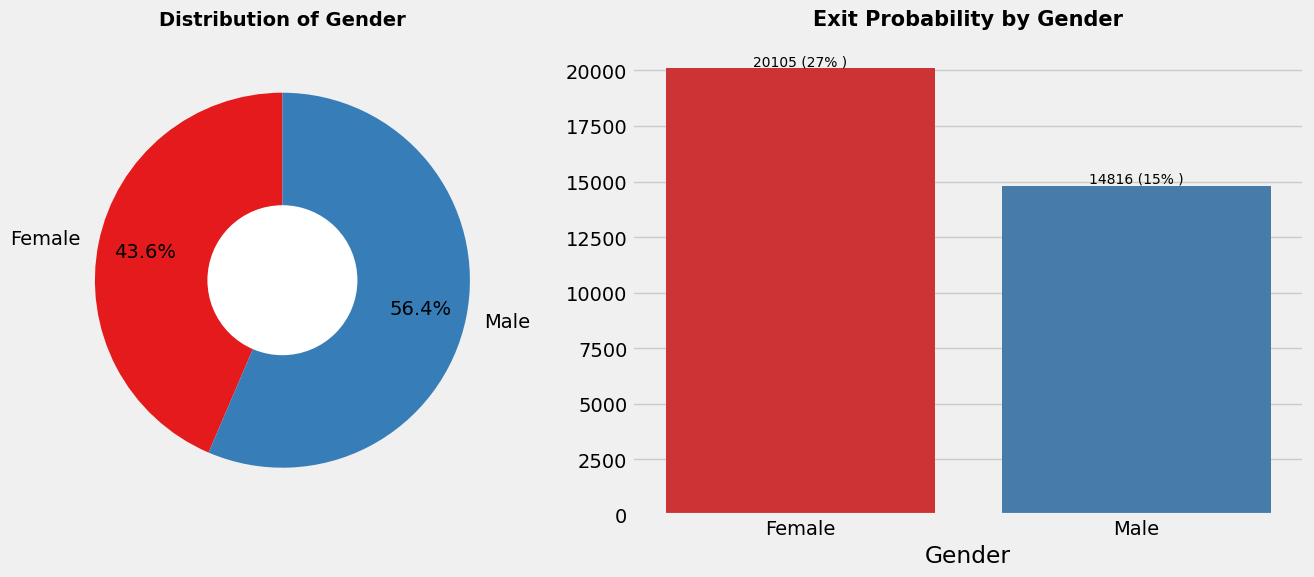

In [15]:
piePlot(train, 'Gender', 'Exited')

In [16]:
# Mean of survival by sex
train[['Gender', 'Exited']].groupby('Gender', as_index = False).mean().sort_values(by = 'Exited', ascending = False)

,Gender,Exited
0,Female,0.279687
1,Male,0.159055




> Comment 
- Female customers are more likely to exit
- Male customers accounts for a higher proportion than female customers by more than 12.6%.
- Attrition in female customers is higher compared to male customers.

In [17]:
# Mean of survival by sex
train[['Geography', 'Exited']].groupby('Geography', as_index = False).mean().sort_values(by = 'Exited', ascending = False)

,Geography,Exited
1,Germany,0.378952
2,Spain,0.172176
0,France,0.165282


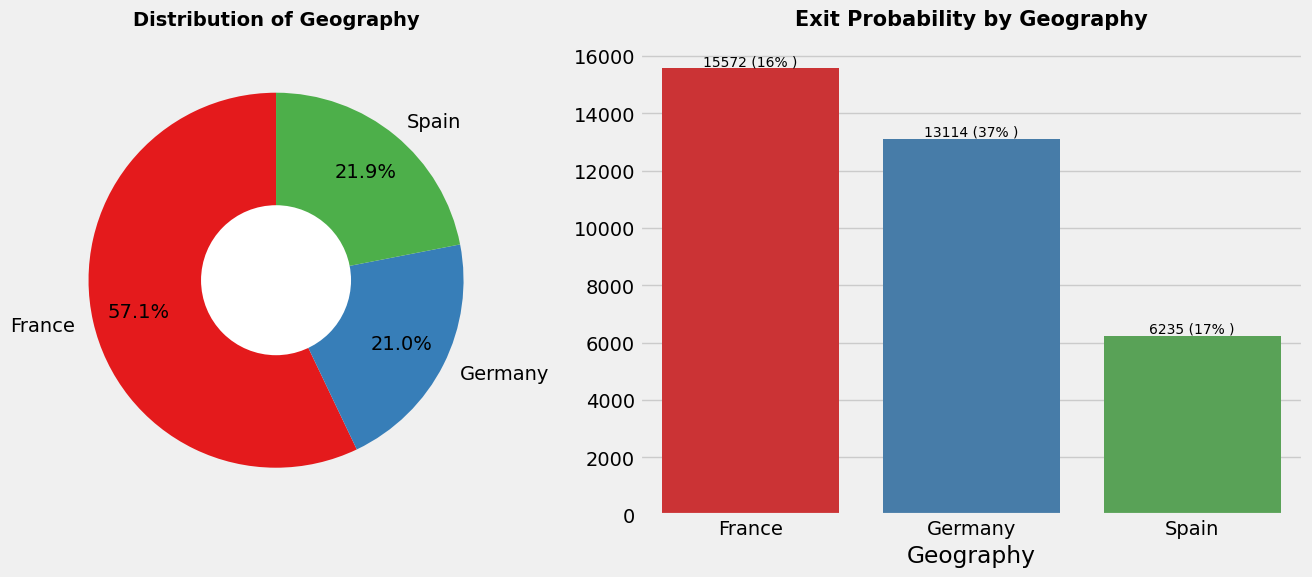

In [18]:
piePlot(train,'Geography','Exited')

> Most of the customers are from France i.e 56.7 % .
- The attrition rate is very high of customers who are from Germany.
- The attrition rate is low for customers who are from France.

In [19]:
# Extract numerical columns
numerical_columns = train.select_dtypes(include=['int64', 'float64']).columns

# Print the numerical columns
print(numerical_columns)

Index(['id', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')


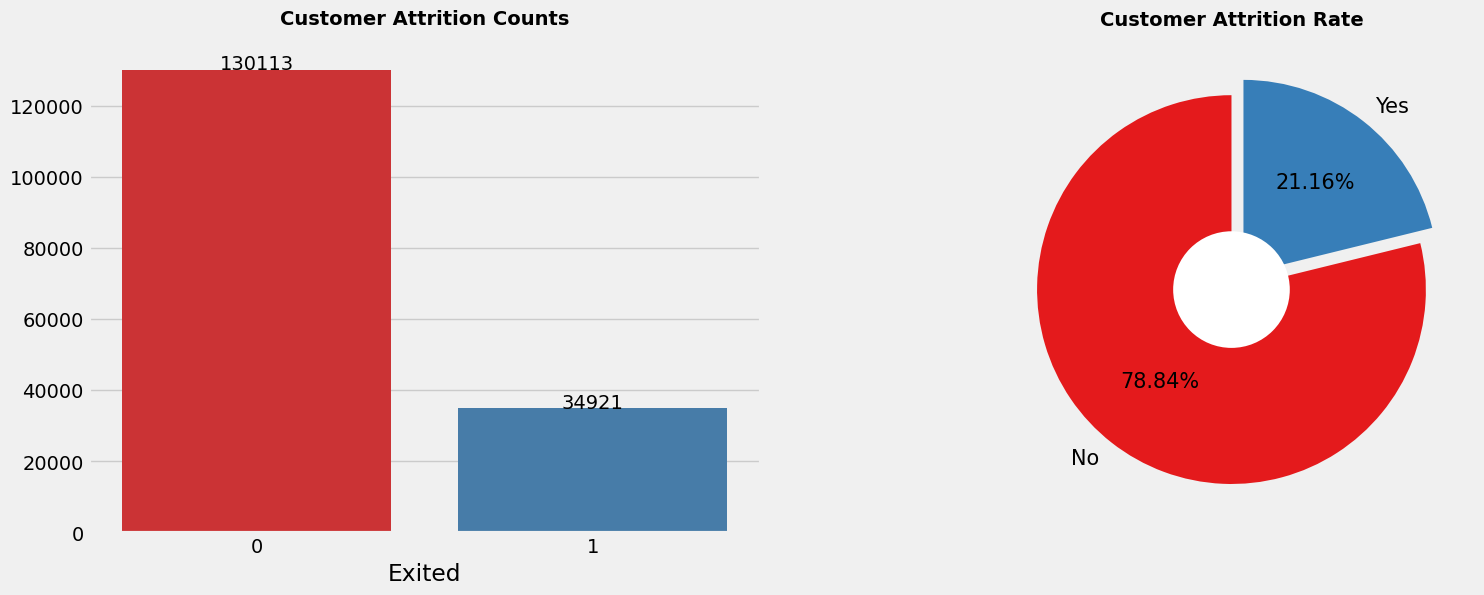

In [20]:
#Visualization to show Employee Attrition in Counts.
plt.figure(figsize=(17,6))
plt.subplot(1,2,1)
attrition_rate = train["Exited"].value_counts()
sns.barplot(x=attrition_rate.index,y=attrition_rate.values,palette= 'Set1')
plt.title("Customer Attrition Counts",fontweight="black", size=14, pad=16)
for i, v in enumerate(attrition_rate.values):
    plt.text(i, v, v,ha="center", fontsize=14)

#Visualization to show Employee Attrition in Percentage.
plt.subplot(1,2,2)
colors = sns.color_palette('Set1', len(attrition_rate))
plt.pie(attrition_rate, labels=["No","Yes"], autopct="%.2f%%", textprops={"size":15},
        colors = colors,explode=[0,0.1],startangle=90)
center_circle = plt.Circle((0, 0), 0.3, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)
plt.title("Customer Attrition Rate",fontweight="black",size=14 ,pad=15)
plt.show()

- > The attrition rate is 21.16% which is too high
- > Imbalanced Target Feature

# Numerical columns 
> Numerical variables in our dataset are 
- id, 
- CustomerId,  
- CreditScore, 
- Age, 
- Tenure, 
- Balance,
- NumOfProducts, 
- HasCrCard, 
- IsActiveMember, 
- EstimatedSalary,
- Exited

## Detect and remove outliers in numerical variables
> Outliers are data points that have extreme values and they do not conform with the majority of the data. It is important to address this because outliers tend to skew our data towards extremes and can cause inaccurate model predictions. I will use the Tukey method to remove these outliers.

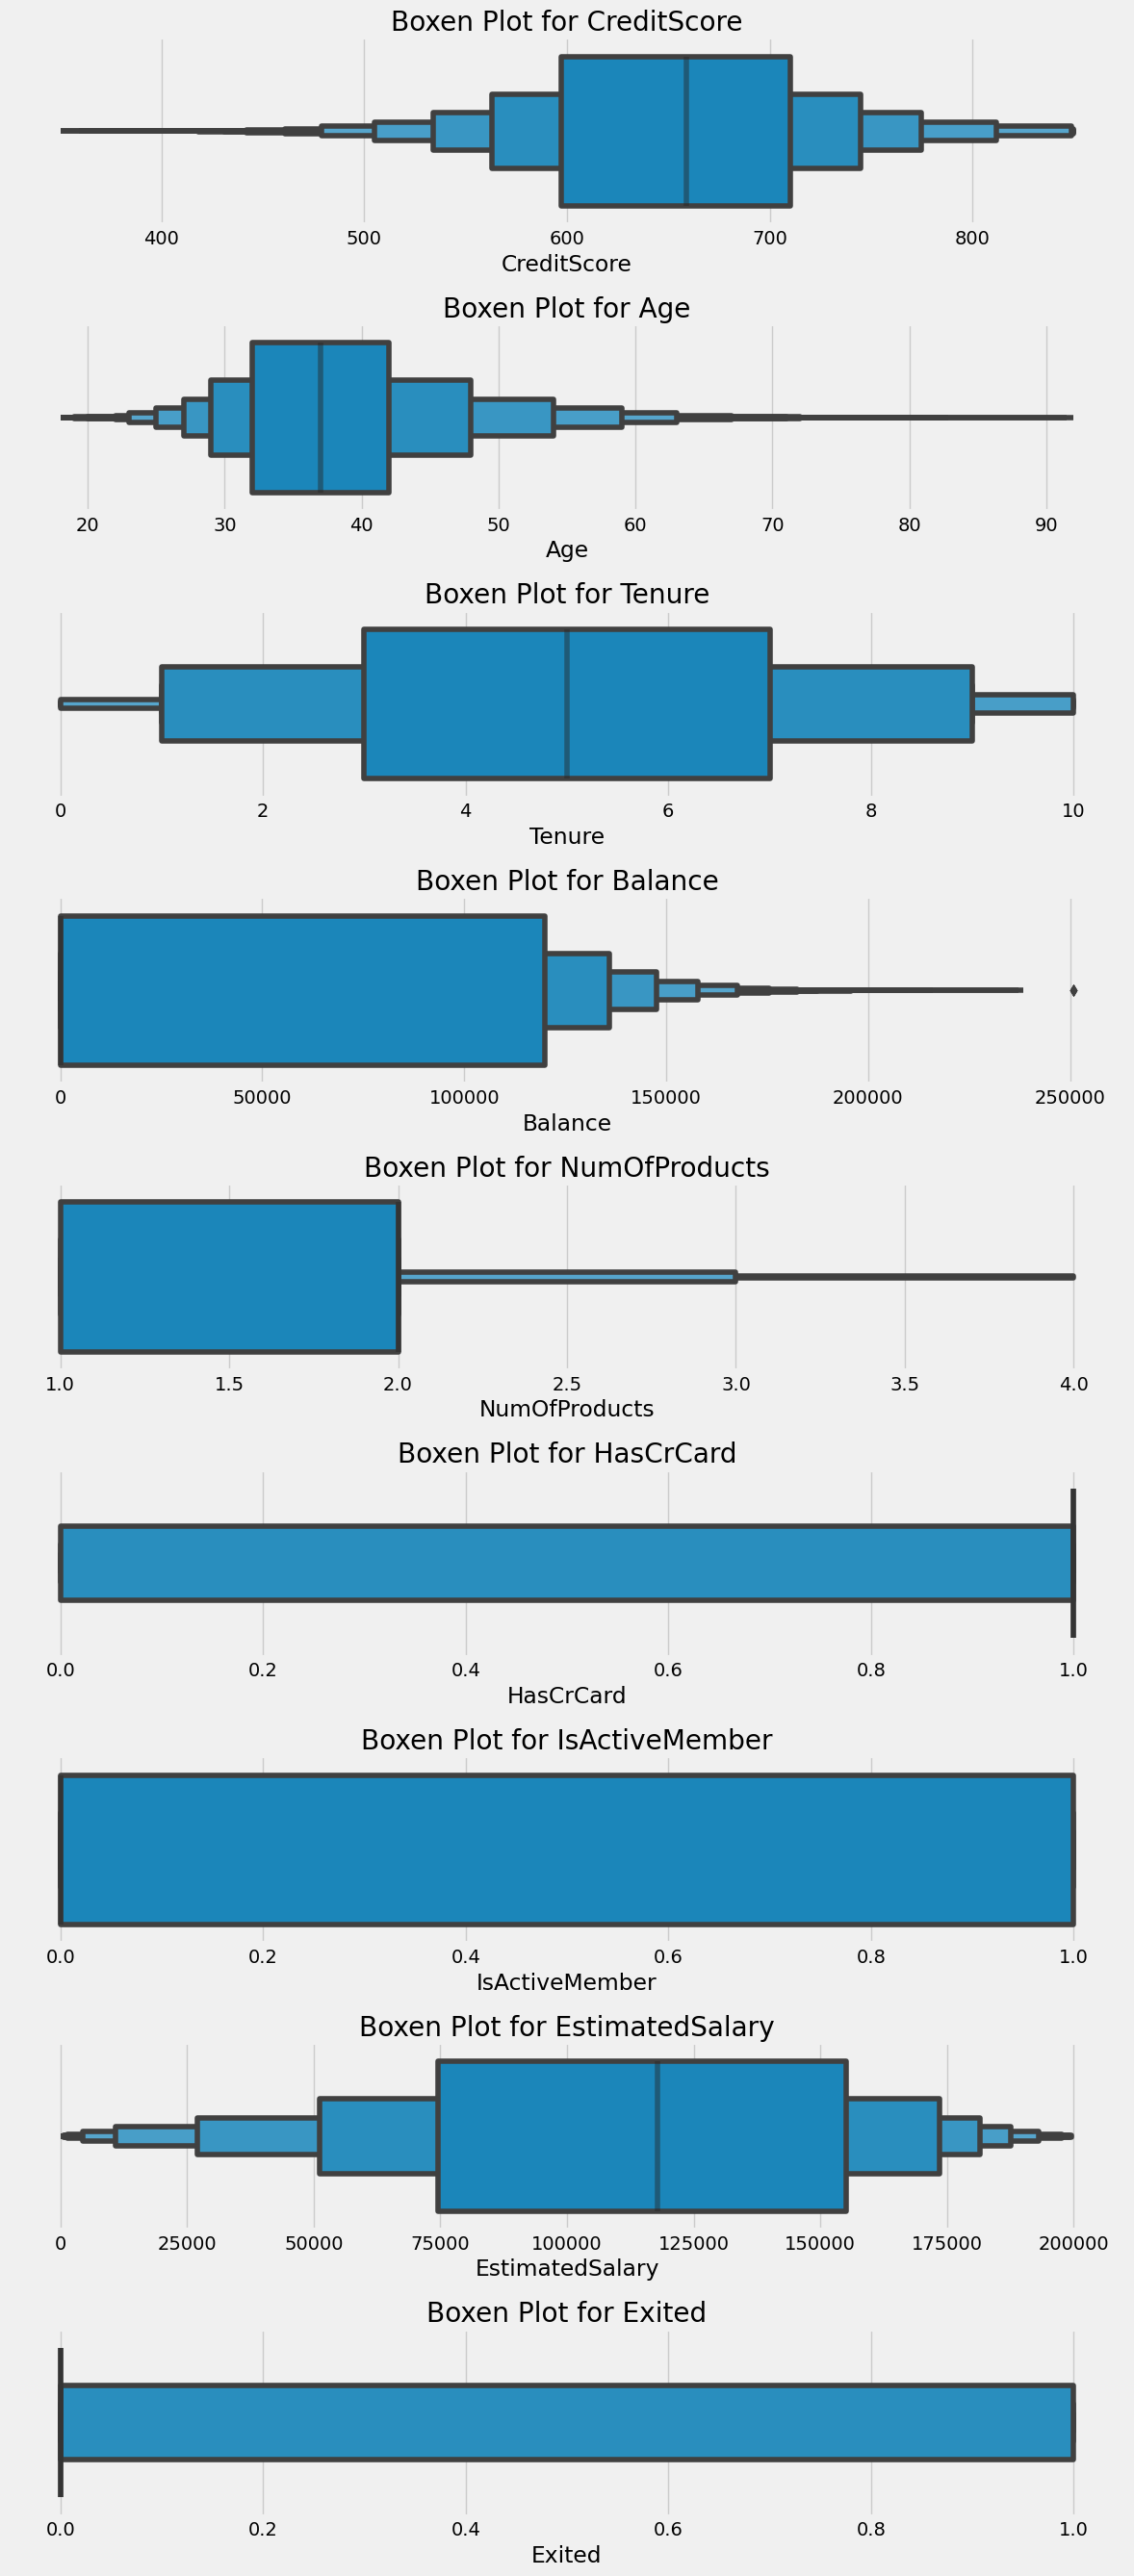

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_individual_boxen_plots(dataframe):
    # Selecting only numerical columns
    numerical_features = dataframe.select_dtypes(include=['int64', 'float64'])

    # Setting up the matplotlib figure with individual subplots
    fig, axes = plt.subplots(nrows=len(numerical_features.columns), figsize=(12, 3 * len(numerical_features.columns)))

    # Creating individual boxen plots for each numerical feature
    for i, feature in enumerate(numerical_features.columns):
        sns.boxenplot(x=numerical_features[feature], ax=axes[i])
        axes[i].set_title(f'Boxen Plot for {feature}')

    # Adjusting layout
    plt.tight_layout()

    # Display the plots
    plt.show()

# Assuming 'df' is your DataFrame with the specified columns
plot_individual_boxen_plots(train[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
                                'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']])


> The dataset has negligible outliers

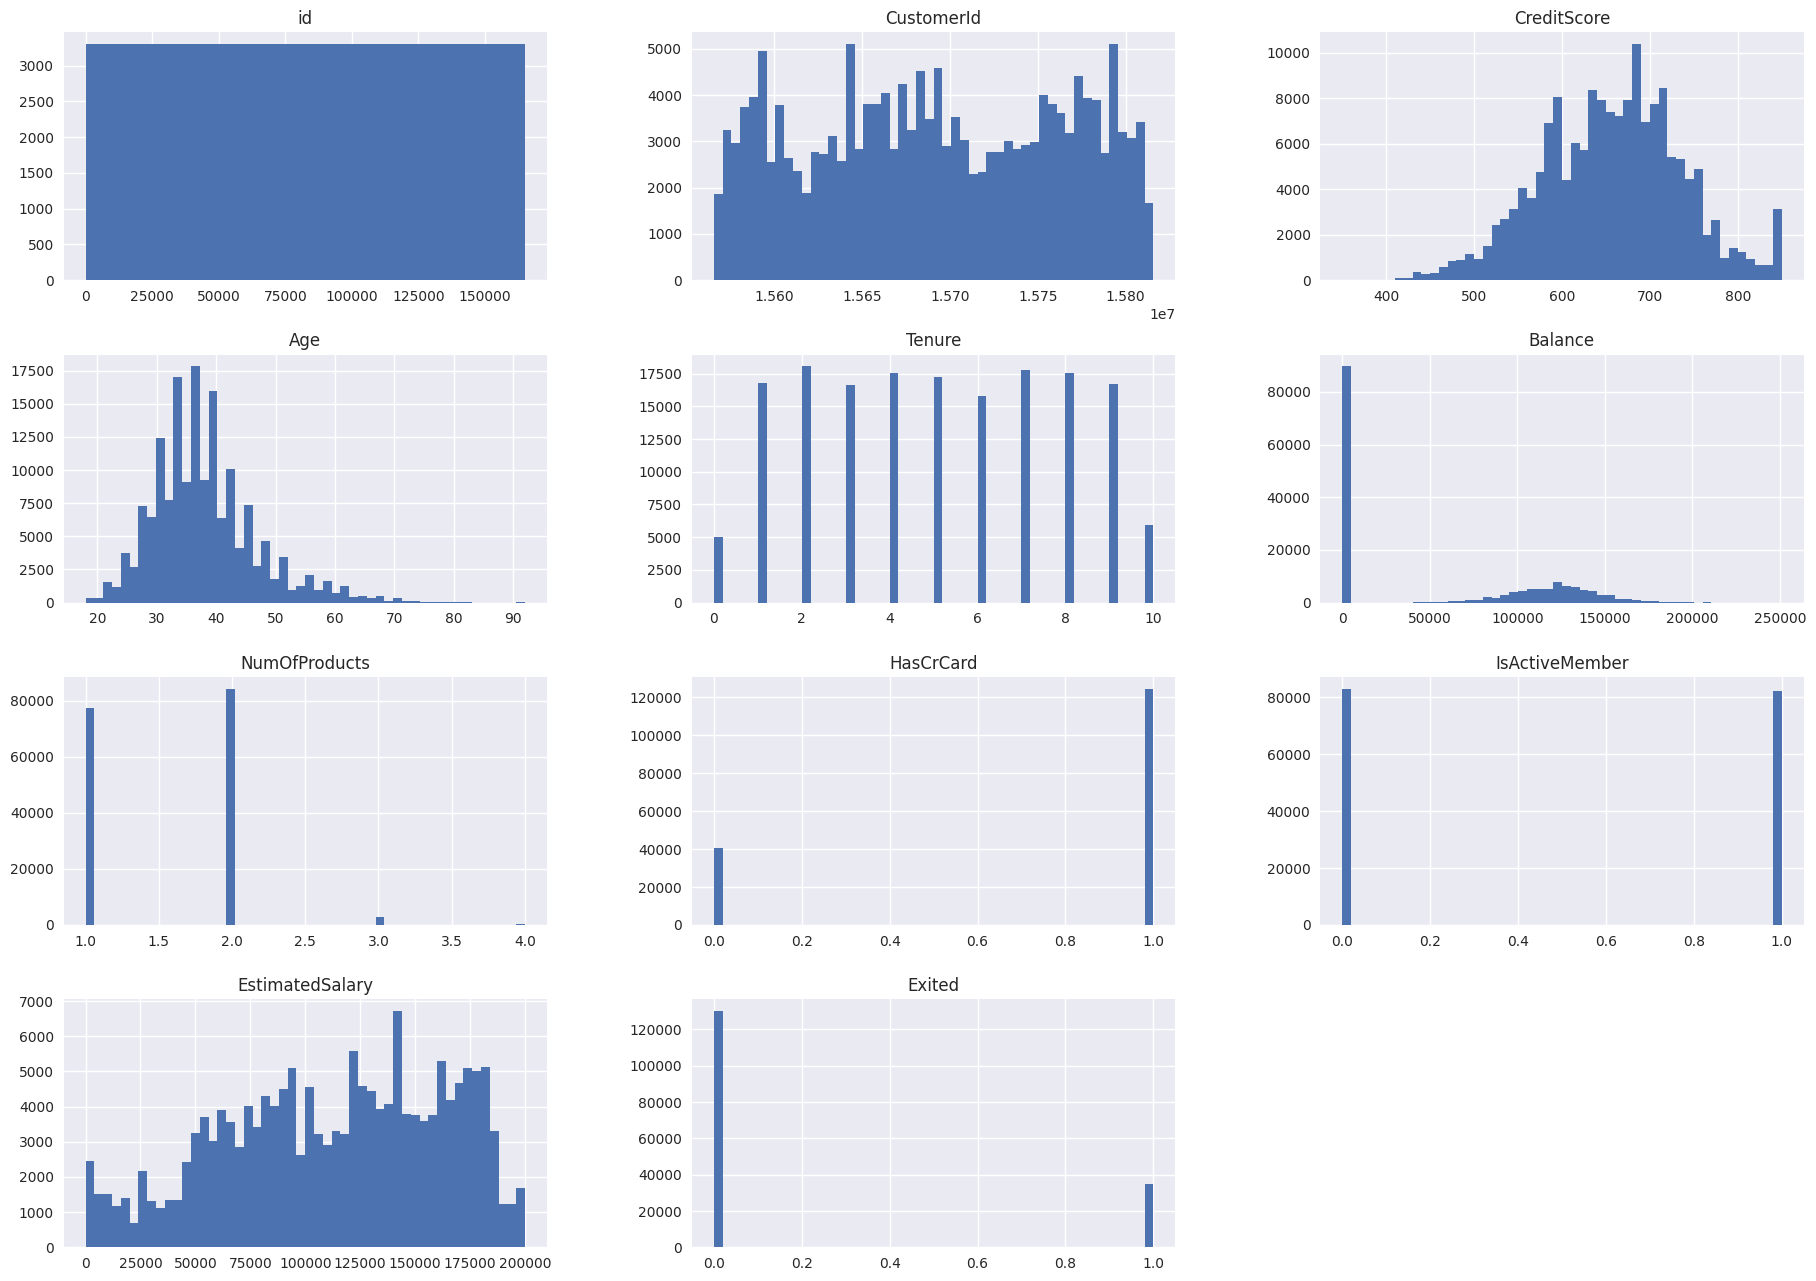

In [22]:
## Plot density plot for all features
plt.style.use('seaborn')
train.hist(bins=50,figsize=(20,15))
plt.show()

In [23]:
def diagnose_dataframe(df, verbose=True):
    """
    Performs various initial inspections on a pandas dataframe and provides details.

    Args:
      df: The pandas dataframe to diagnose.
      verbose: Whether to print details for each inspection.

    Returns:
      A dictionary containing the results of the inspections.
    """

    results = {}

    # Basic information
    results["shape"] = df.shape
    results["columns"] = list(df.columns)
    results["dtypes"] = df.dtypes.to_dict()

    # Check for disparities between dtypes and actual values
    dtypes_disparities = {}
    for col in df.columns:
        unique_values = df[col].unique()
        dtype = df[col].dtype
        unique_types = set(type(value).__name__ for value in unique_values)
        if len(unique_types) > 1:
            dtypes_disparities[col] = {"dtype": dtype, "unique_types": list(unique_types)}

    results["dtypes_disparities"] = dtypes_disparities

    # Unique values and counts
    for col in df.columns:
        results[f"unique_values_{col}"] = df[col].unique()

    if verbose:
        for key, value in results.items():
            print(f"\n{key}:\n{value}")

    return results


In [24]:
diagnose_dataframe(train)


shape:
(165034, 15)

columns:
['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited', 'attrition_label']

dtypes:
{'id': dtype('int64'), 'CustomerId': dtype('int64'), 'Surname': dtype('O'), 'CreditScore': dtype('int64'), 'Geography': dtype('O'), 'Gender': dtype('O'), 'Age': dtype('int64'), 'Tenure': dtype('int64'), 'Balance': dtype('float64'), 'NumOfProducts': dtype('int64'), 'HasCrCard': dtype('float64'), 'IsActiveMember': dtype('float64'), 'EstimatedSalary': dtype('float64'), 'Exited': dtype('int64'), 'attrition_label': dtype('O')}

dtypes_disparities:
{}

unique_values_id:
[     0      1      2 ... 165031 165032 165033]

unique_values_CustomerId:
[15674932 15749177 15694510 ... 15673571 15692656 15815050]

unique_values_Surname:
['Okwudilichukwu' 'Okwudiliolisa' 'Hsueh' ... 'Aliyev' 'McMinn' 'Elkins']

unique_values_CreditScore:
[668 627 678 581 716 588 593 676 583

{'shape': (165034, 15),
 'columns': ['id',
  'CustomerId',
  'Surname',
  'CreditScore',
  'Geography',
  'Gender',
  'Age',
  'Tenure',
  'Balance',
  'NumOfProducts',
  'HasCrCard',
  'IsActiveMember',
  'EstimatedSalary',
  'Exited',
  'attrition_label'],
 'dtypes': {'id': dtype('int64'),
  'CustomerId': dtype('int64'),
  'Surname': dtype('O'),
  'CreditScore': dtype('int64'),
  'Geography': dtype('O'),
  'Gender': dtype('O'),
  'Age': dtype('int64'),
  'Tenure': dtype('int64'),
  'Balance': dtype('float64'),
  'NumOfProducts': dtype('int64'),
  'HasCrCard': dtype('float64'),
  'IsActiveMember': dtype('float64'),
  'EstimatedSalary': dtype('float64'),
  'Exited': dtype('int64'),
  'attrition_label': dtype('O')},
 'dtypes_disparities': {},
 'unique_values_id': array([     0,      1,      2, ..., 165031, 165032, 165033]),
 'unique_values_CustomerId': array([15674932, 15749177, 15694510, ..., 15673571, 15692656, 15815050]),
 'unique_values_Surname': array(['Okwudilichukwu', 'Okwudiliol

In [25]:
import pandas as pd

def check_whitespace_and_special_chars(df):
    # Check values in the DataFrame
    rows_with_whitespace = df.apply(lambda row: row.astype(str).str.contains(r'\s|[^A-Za-z0-9]', na=False).any(), axis=1)
    if any(rows_with_whitespace):
        problematic_features = df[rows_with_whitespace].apply(lambda row: [col for col, value in row.items() if isinstance(value, str) and (value.isspace() or not value.isalnum())], axis=1)
        all_problematic_features = [feature for sublist in problematic_features for feature in sublist]
        unique_problematic_features = set(all_problematic_features)
        print("Features with unnecessary whitespaces or special characters in their rows:", unique_problematic_features)
    else:
        print("No white spaces or special characters found in values.")

# Example usage
# Replace 'your_dataframe' with the actual DataFrame you want to check
check_whitespace_and_special_chars(train)
# Remove whitespaces from all rows
#train = train.applymap(lambda x: x.strip() if isinstance(x, str) else x)



Features with unnecessary whitespaces or special characters in their rows: {'Surname'}


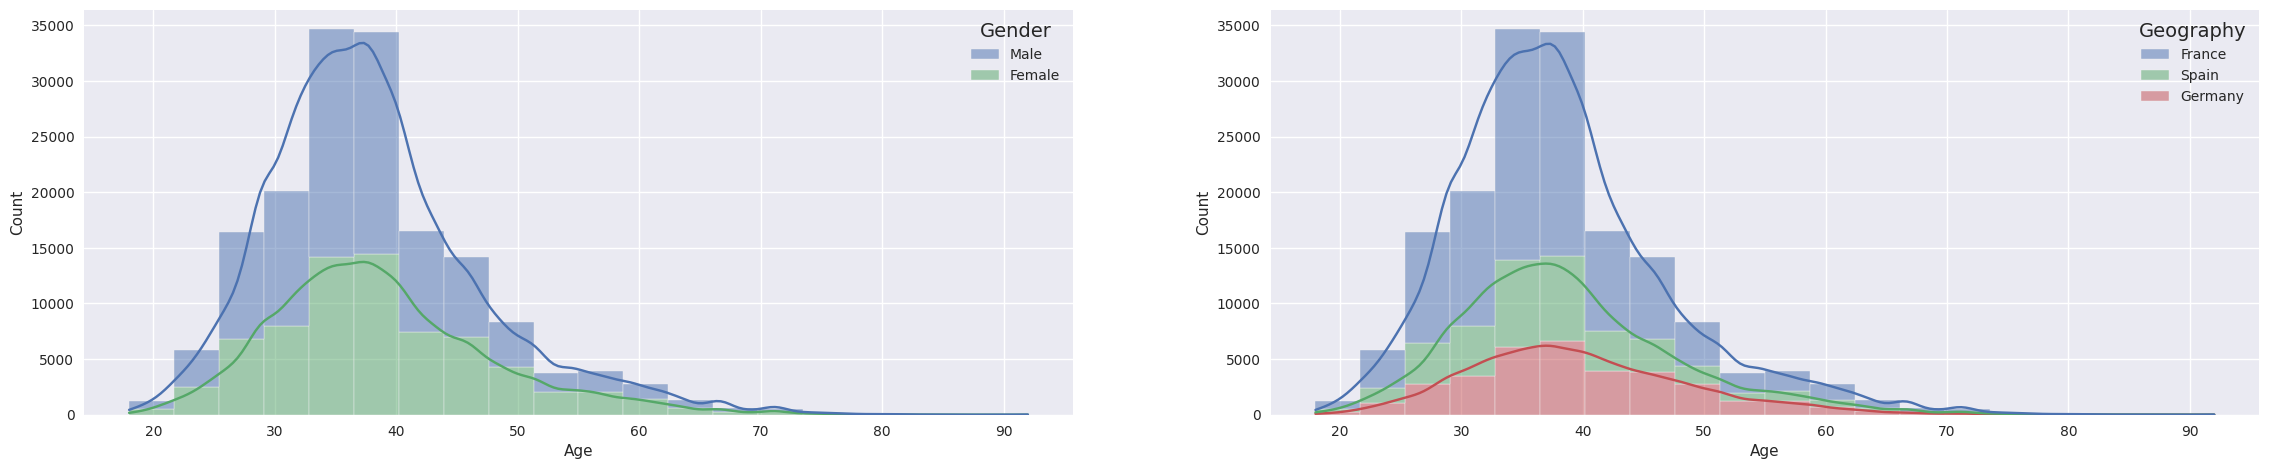

In [26]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(25,5))
plt.subplot(121)
sns.histplot(x = 'Age', data = train,bins=20,hue='Gender', multiple = 'stack',kde=True)

plt.subplot(122)
sns.histplot(x = 'Age', data = train,bins=20,hue='Geography', multiple = 'stack',kde=True)

plt.show()

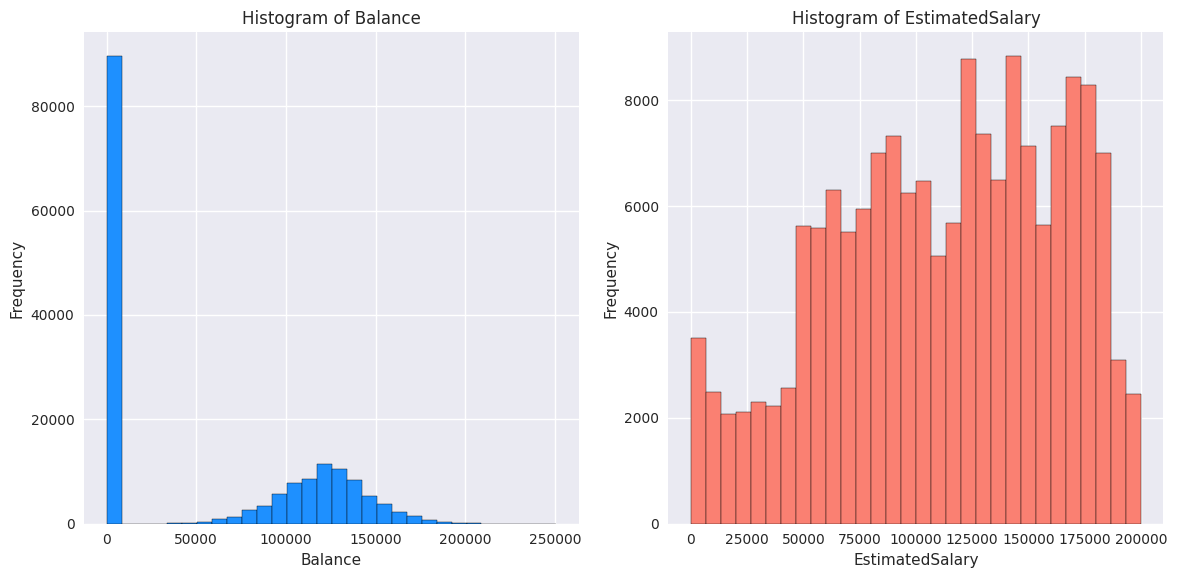

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(train['Balance'], bins=30, color='dodgerblue', edgecolor='black')
plt.title('Histogram of Balance')
plt.xlabel('Balance')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(train['EstimatedSalary'], bins=30, color='salmon', edgecolor='black')
plt.title('Histogram of EstimatedSalary')
plt.xlabel('EstimatedSalary')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


6. # Data Preprocessing 

> Data preprocessing is the process of getting our dataset ready for model training. In this section, we will perform the following preprocessing steps:

- Drop and fill missing values
- Data trasformation (log transformation)
- Feature engineering
- Feature encoding

In [28]:
train.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,attrition_label
0,0,15674932,Okwudilichukwu,668,France,Male,33,3,0.00,2,1.0,0.0,181449.97,0,No
1,1,15749177,Okwudiliolisa,627,France,Male,33,1,0.00,2,1.0,1.0,49503.50,0,No
2,2,15694510,Hsueh,678,France,Male,40,10,0.00,2,1.0,0.0,184866.69,0,No
3,3,15741417,Kao,581,France,Male,34,2,148882.54,1,1.0,1.0,84560.88,0,No
4,4,15766172,Chiemenam,716,Spain,Male,33,5,0.00,2,1.0,1.0,15068.83,0,No


In [29]:
#
train_cols_to_drop = ["id", "CustomerId", "Surname","attrition_label"]
train.drop(columns=train_cols_to_drop, inplace=True)
#
test_cols_to_drop = ["id", "CustomerId", "Surname"]
test.drop(columns=test_cols_to_drop, inplace=True)

# Encoding 


In [30]:
train['Gender'] = np.where(train['Gender'].str.contains("Male"),0,1)
test['Gender'] = np.where(test['Gender'].str.contains("Male"),0,1)

In [31]:
# Using pandas get_dummies for one-hot encoding
train_encoded = pd.get_dummies(train, columns=['Geography'], prefix='geo')
test_encoded = pd.get_dummies(test, columns=['Geography'], prefix='geo')

In [32]:
# Convert specific boolean columns to integer (1 and 0)
columns_to_convert = ['geo_France', 'geo_Germany', 'geo_Spain']
train_encoded[columns_to_convert] = train_encoded[columns_to_convert].astype(int)
test_encoded[columns_to_convert] = test_encoded[columns_to_convert].astype(int)

In [33]:
train_encoded.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,geo_France,geo_Germany,geo_Spain
0,668,0,33,3,0.00,2,1.0,0.0,181449.97,0,1,0,0
1,627,0,33,1,0.00,2,1.0,1.0,49503.50,0,1,0,0
2,678,0,40,10,0.00,2,1.0,0.0,184866.69,0,1,0,0
3,581,0,34,2,148882.54,1,1.0,1.0,84560.88,0,1,0,0
4,716,0,33,5,0.00,2,1.0,1.0,15068.83,0,0,0,1


Maximum correlation: 1.0


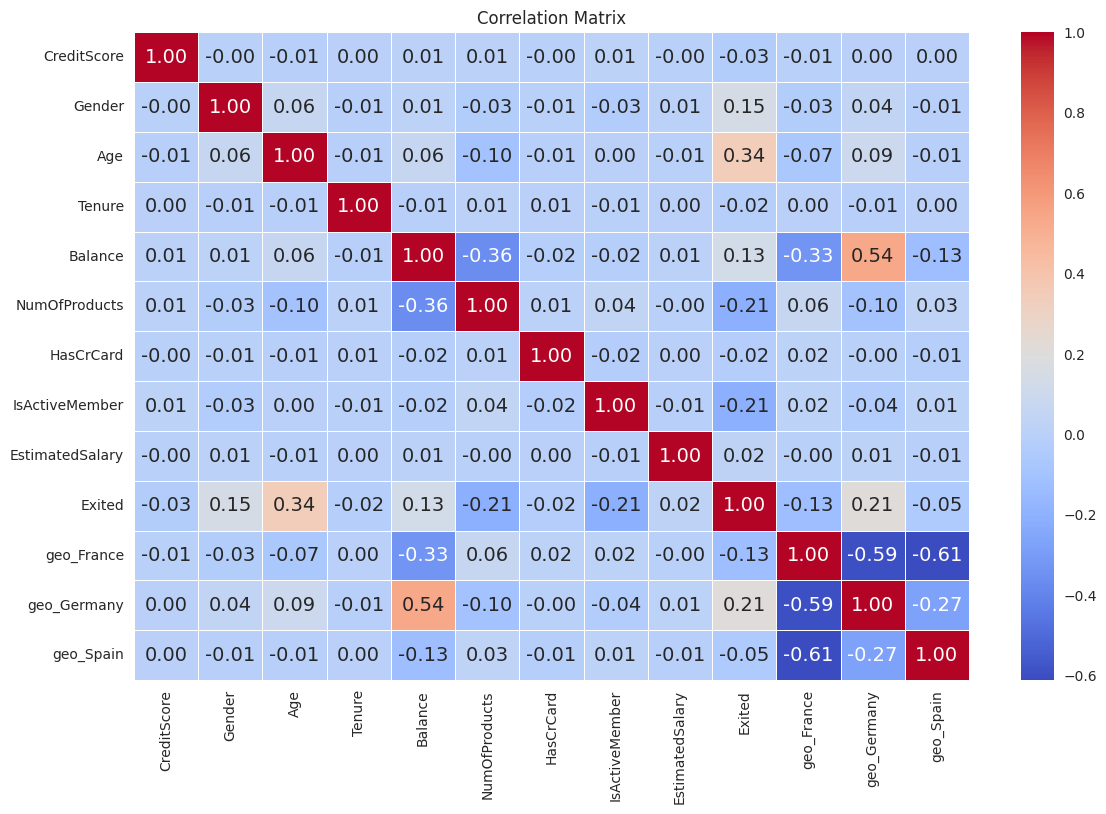

In [34]:
import matplotlib.pyplot as plt

# Assuming df1 is your DataFrame
numeric_columns = train_encoded.select_dtypes(include=['float64', 'int64']).columns

# Exclude non-numeric columns before calculating correlation
corr_matrix = train_encoded[numeric_columns].corr()

# Find the maximum correlation value
max_corr = corr_matrix.stack().max()

print("Maximum correlation:", max_corr)

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


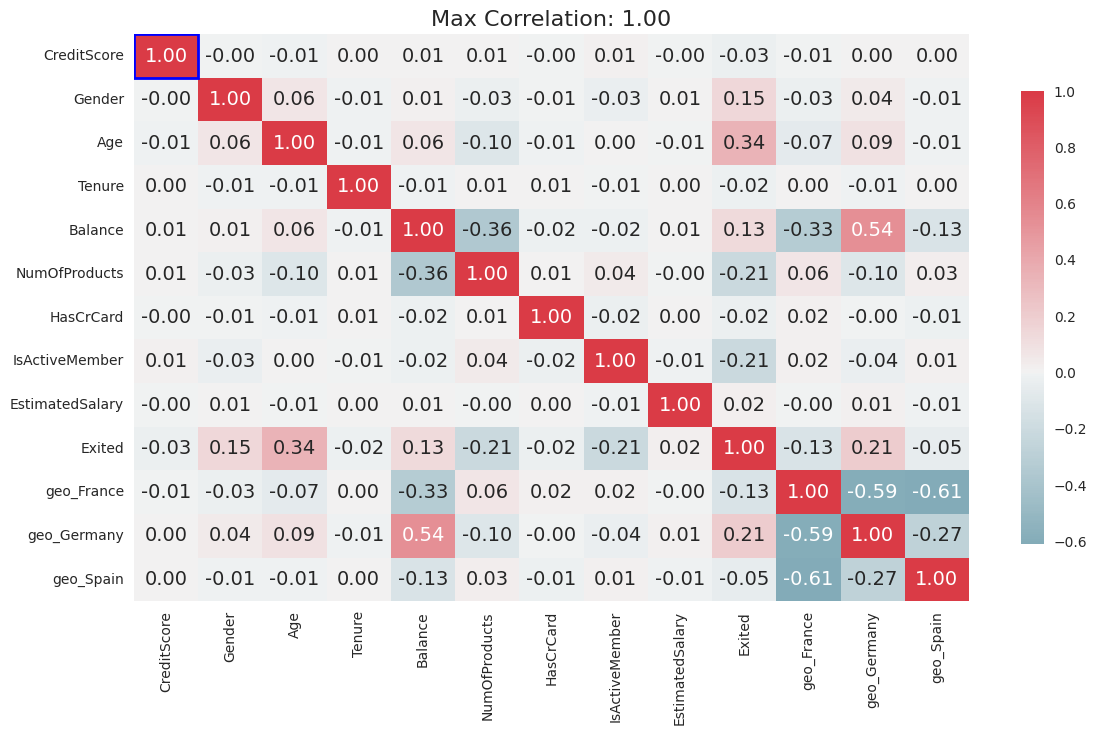

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df1 is your DataFrame
numeric_columns = train_encoded.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
corr_matrix = numeric_columns.corr()

# Find the maximum correlation value and its indices
max_corr = corr_matrix.stack().max()
max_corr_indices = corr_matrix.stack().idxmax()

# Create a custom colormap for the heatmap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Converting column names (strings) to numerical indices for the matplotlib coordinates

# Adjusting indices for matplotlib which uses zero-based indexing
# Converting column names to numerical indices
adjusted_indices = (corr_matrix.columns.get_loc(max_corr_indices[1]), corr_matrix.index.get_loc(max_corr_indices[0]))
plt.figure(figsize=(12, 7))
ax = sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap=cmap, center=0, cbar_kws={"shrink": 0.8})
plt.title(f'Max Correlation: {max_corr:.2f}', fontsize=16)

# Highlight the cell with the highest correlation value
highlighted_cell = plt.Rectangle(adjusted_indices, 1, 1, fill=False, edgecolor='blue', lw=2)
ax.add_patch(highlighted_cell)

plt.show()


In [36]:
!pip install klib 

  Obtaining dependency information for klib from https://files.pythonhosted.org/packages/96/d5/4978eb763ed5dea42633df2ff2db9893bd70091ca5469383b3da7b8352f7/klib-1.1.2-py3-none-any.whl.metadata


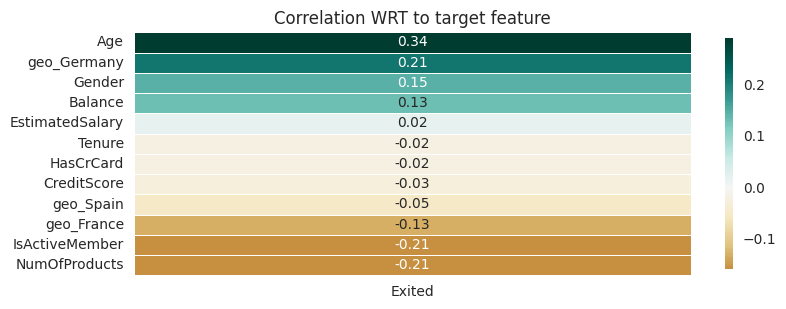

In [37]:
import klib as kl 
kl.corr_plot(train_encoded,target='Exited',figsize=(8,3))
plt.title("Correlation WRT to target feature")
plt.show()

Displaying positive correlations. Specify a positive "threshold" to limit the results further.


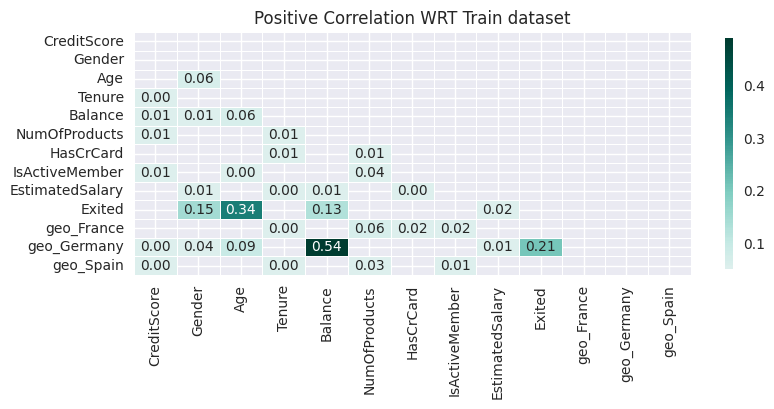

In [38]:
kl.corr_plot(train_encoded,split='pos', figsize=(8,3))
plt.title("Positive Correlation WRT Train dataset")
plt.show()


> A correlation coefficient of 0.33 between the 'Age' feature and the target feature 'Exited' (assuming positive values represent a positive correlation) indicates a moderate positive relationship between these two variables.

- Here's an interpretation of a positive correlation:

> Age and Likelihood of Exiting:

A positive correlation of 0.33 suggests that, on average, as the 'Age' of a customer increases, the likelihood of them exiting the service also tends to increase, and vice versa.
This could mean that older customers may have different preferences, needs, or reasons for exiting compared to younger customers.

Displaying negative correlations. Specify a negative "threshold" to limit the results further.


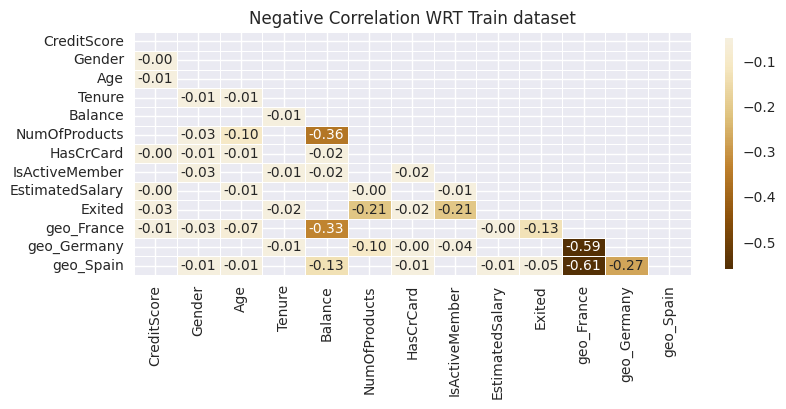

In [39]:
kl.corr_plot(train_encoded,split='neg', figsize=(8,3))
plt.title("Negative Correlation WRT Train dataset")
plt.show()


> A correlation coefficient of -0.37 between the 'Balance' feature and the target feature 'Exited' indicates a moderate negative relationship between these two variables.

- Here's an interpretation of a negative correlation:

- Balance and Likelihood of Exiting:

A negative correlation of -0.37 suggests that, on average, as the 'Balance' of a customer increases, the likelihood of them exiting the service tends to decrease, and vice versa.
Customers with lower balances are more likely to exit, while those with higher balances are less likely to exit.

Displaying positive correlations. Specify a positive "threshold" to limit the results further.


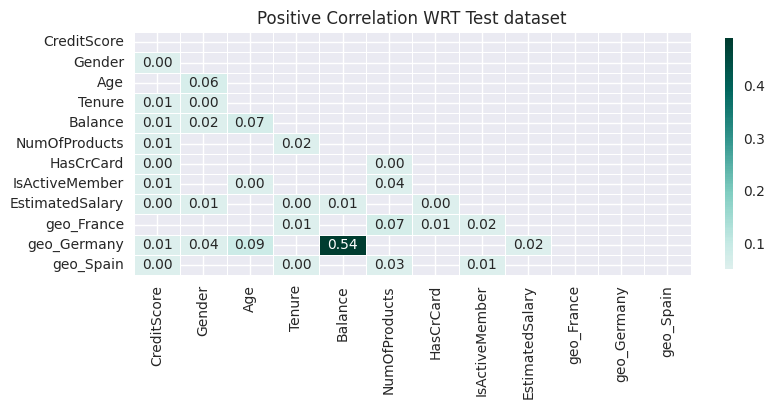

In [40]:
kl.corr_plot(test_encoded,split='pos', figsize=(8,3))
plt.title("Positive Correlation WRT Test dataset")
plt.show()

Displaying negative correlations. Specify a negative "threshold" to limit the results further.


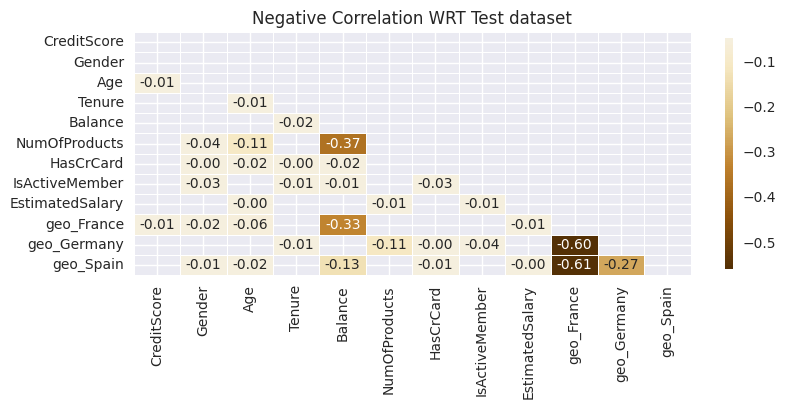

In [41]:
kl.corr_plot(test_encoded,split='neg', figsize=(8,3))
plt.title("Negative Correlation WRT Test dataset")
plt.show()

In [42]:
high_correlation_mask = corr_matrix >= 0.75

# Identify and list the highly correlated features
highly_correlated_features = []

for feature in high_correlation_mask.columns:
    correlated_with = high_correlation_mask.index[high_correlation_mask[feature]].tolist()
    for correlated_feature in correlated_with:
        if feature != correlated_feature and (correlated_feature, feature) not in highly_correlated_features:
            highly_correlated_features.append((feature, correlated_feature))

# Print the highly correlated features
print("Highly correlated features:")
for feature1, feature2 in highly_correlated_features:
    print(f"{feature1} and {feature2}")

Highly correlated features:


> # No highly correlated features

In [43]:
# Split the dataset into Dependent & Independent features
X = train_encoded.drop(['Exited'], axis=1)
Y = train_encoded[['Exited']]

In [44]:
X.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,geo_France,geo_Germany,geo_Spain
0,668,0,33,3,0.00,2,1.0,0.0,181449.97,1,0,0
1,627,0,33,1,0.00,2,1.0,1.0,49503.50,1,0,0
2,678,0,40,10,0.00,2,1.0,0.0,184866.69,1,0,0
3,581,0,34,2,148882.54,1,1.0,1.0,84560.88,1,0,0
4,716,0,33,5,0.00,2,1.0,1.0,15068.83,0,0,1


In [45]:
Y.head()

,Exited
0,0
1,0
2,0
3,0
4,0


# SMOTE 
> to address the imbalanced target feature

In [46]:
import imblearn
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_smote, Y_smote = smote.fit_resample(X, Y)
print("Before SMOTE" , Y.value_counts())
print()
print("After SMOTE" , Y_smote.value_counts())

Before SMOTE Exited
0         130113
1          34921
Name: count, dtype: int64

After SMOTE Exited
0         130113
1         130113
Name: count, dtype: int64
